<a href="https://colab.research.google.com/github/chandc/AWS_SageMaker/blob/master/Copy_of_Mobile_Upload_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%config IPCompleter.greedy=True
!python --version

Python 3.6.8


In [2]:
from google.colab import  files
uploaded = files.upload()

Saving Validations and Submissions as of 11012019 4_37_PM.csv to Validations and Submissions as of 11012019 4_37_PM (1).csv


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import io
%matplotlib inline

!pwd
!ls

/content
 sample_data
'Validations and Submissions as of 11012019 4_37_PM (1).csv'
'Validations and Submissions as of 11012019 4_37_PM.csv'


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['Validations and Submissions as of 11012019 4_37_PM.csv']), index_col=None)

In [5]:
df.head(2)

,MOBILE_APP_REQUEST_ID,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,MOBILE_SUBMISSION_ID,Size,Page Count,INSERT_TS.1,LAST_UPDATE_TS,CLIENT_VERSION
0,338,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,Successful validation.,NaN,NaN,NaN,2019-10-28 02:02:27,2019-10-28 02:02:29,1.0.201910230000.2
1,343,2019-10-28 07:25:18,300100,SM-N960U1,28,Successful validation.,NaN,NaN,NaN,2019-10-28 07:25:18,2019-10-28 07:25:21,1.0


In [6]:
df.shape

(4433, 12)

In [7]:
df.dtypes

MOBILE_APP_REQUEST_ID     int64
INSERT_TS                object
RESPONSE_STATUS_ID        int64
DEVICE                   object
DEVICE_OS                object
RESPONSE_STATUS_NAME     object
MOBILE_SUBMISSION_ID     object
Size                     object
Page Count               object
INSERT_TS.1              object
LAST_UPDATE_TS           object
CLIENT_VERSION           object
dtype: object

In [0]:
# convert INSERT_TS, INSERT_TS.1 and LAST_UPDATE_TS to datetime
df['INSERT_TS'] = pd.to_datetime(df['INSERT_TS'])
df['INSERT_TS.1'] = pd.to_datetime(df['INSERT_TS.1'])
df['LAST_UPDATE_TS'] = pd.to_datetime(df['LAST_UPDATE_TS'])

In [9]:
df.dtypes

MOBILE_APP_REQUEST_ID             int64
INSERT_TS                datetime64[ns]
RESPONSE_STATUS_ID                int64
DEVICE                           object
DEVICE_OS                        object
RESPONSE_STATUS_NAME             object
MOBILE_SUBMISSION_ID             object
Size                             object
Page Count                       object
INSERT_TS.1              datetime64[ns]
LAST_UPDATE_TS           datetime64[ns]
CLIENT_VERSION                   object
dtype: object

In [10]:
df['INSERT_TS'].dt.time

0       02:02:27
1       07:25:18
2       08:05:07
3       08:32:42
4       08:33:43
          ...   
4428    16:31:33
4429    16:31:45
4430    16:32:22
4431    16:32:42
4432    16:33:05
Name: INSERT_TS, Length: 4433, dtype: object

In [11]:
df.tail(2)

,MOBILE_APP_REQUEST_ID,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,MOBILE_SUBMISSION_ID,Size,Page Count,INSERT_TS.1,LAST_UPDATE_TS,CLIENT_VERSION
4431,10894,2019-11-01 16:32:42,300100,iPhone 8 Plus,13.1.3,Successful validation.,NaN,NaN,NaN,2019-11-01 16:32:42,2019-11-01 16:32:42,1.0.201910230000.2
4432,10897,2019-11-01 16:33:05,300100,iPhone 8,13.1.2,Successful validation.,NaN,NaN,NaN,2019-11-01 16:33:05,2019-11-01 16:33:07,1.0.201910230000.2


In [12]:
df = df.drop(columns=[ "MOBILE_APP_REQUEST_ID", "INSERT_TS.1", "MOBILE_SUBMISSION_ID"])
df.head()

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,Successful validation.,NaN,NaN,2019-10-28 02:02:29,1.0.201910230000.2
1,2019-10-28 07:25:18,300100,SM-N960U1,28,Successful validation.,NaN,NaN,2019-10-28 07:25:21,1.0
2,2019-10-28 08:05:07,300100,SM-G960U,28,Successful validation.,NaN,NaN,2019-10-28 08:05:12,1.0
3,2019-10-28 08:32:42,300100,SM-G960U,28,Successful validation.,NaN,NaN,2019-10-28 08:32:46,1.0
4,2019-10-28 08:33:43,300200,SM-G960U,28,INFORMATION_NOT_VERIFIED_TITLE,NaN,NaN,2019-10-28 08:33:47,1.0


### Extract page counts and submission sizes


In [0]:
df["Page Count"] = df["Page Count"].str.extract(r'\b(\w+)$', expand=True)

In [14]:
df["Size"] = df["Size"].str.extract(r'\b(\w+)$', expand=True)
df.head(20)

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,Successful validation.,NaN,NaN,2019-10-28 02:02:29,1.0.201910230000.2
1,2019-10-28 07:25:18,300100,SM-N960U1,28,Successful validation.,NaN,NaN,2019-10-28 07:25:21,1.0
2,2019-10-28 08:05:07,300100,SM-G960U,28,Successful validation.,NaN,NaN,2019-10-28 08:05:12,1.0
3,2019-10-28 08:32:42,300100,SM-G960U,28,Successful validation.,NaN,NaN,2019-10-28 08:32:46,1.0
4,2019-10-28 08:33:43,300200,SM-G960U,28,INFORMATION_NOT_VERIFIED_TITLE,NaN,NaN,2019-10-28 08:33:47,1.0
5,2019-10-28 08:34:22,300100,SM-G960U,28,Successful validation.,NaN,NaN,2019-10-28 08:34:22,1.0
6,2019-10-28 08:57:13,300100,iPhone XS Max,13.1.3,Successful validation.,NaN,NaN,2019-10-28 08:57:17,1.0.201910230000.2
7,2019-10-28 08:59:24,300100,iPhone XR,13.1.2,Successful validation.,NaN,NaN,2019-10-28 08:59:28,1.0.201910230000.2
8,2019-10-28 08:59:28,400205,iPhone XS Max,13.1.3,Invalid image content,10155392,4,2019-10-28 08:59:29,1.0.201910230000.2
9,2019-10-28 09:00:34,400205,iPhone XS Max,13.1.3,Invalid image content,10155392,4,2019-10-28 09:00:35,1.0.201910230000.2


In [15]:
df.dtypes

INSERT_TS               datetime64[ns]
RESPONSE_STATUS_ID               int64
DEVICE                          object
DEVICE_OS                       object
RESPONSE_STATUS_NAME            object
Size                            object
Page Count                      object
LAST_UPDATE_TS          datetime64[ns]
CLIENT_VERSION                  object
dtype: object

In [16]:
df["Size"] = pd.to_numeric(df.Size)
df["Page Count"] = pd.to_numeric(df["Page Count"])
df.dtypes

INSERT_TS               datetime64[ns]
RESPONSE_STATUS_ID               int64
DEVICE                          object
DEVICE_OS                       object
RESPONSE_STATUS_NAME            object
Size                           float64
Page Count                     float64
LAST_UPDATE_TS          datetime64[ns]
CLIENT_VERSION                  object
dtype: object

In [0]:
df["Size"].fillna(0, inplace=True)
df["Page Count"].fillna(0, inplace=True)

In [18]:
df["Size"] = df["Size"].astype(int)
df["Page Count"] = df["Page Count"].astype(int)
df.head(10)


,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,Successful validation.,0,0,2019-10-28 02:02:29,1.0.201910230000.2
1,2019-10-28 07:25:18,300100,SM-N960U1,28,Successful validation.,0,0,2019-10-28 07:25:21,1.0
2,2019-10-28 08:05:07,300100,SM-G960U,28,Successful validation.,0,0,2019-10-28 08:05:12,1.0
3,2019-10-28 08:32:42,300100,SM-G960U,28,Successful validation.,0,0,2019-10-28 08:32:46,1.0
4,2019-10-28 08:33:43,300200,SM-G960U,28,INFORMATION_NOT_VERIFIED_TITLE,0,0,2019-10-28 08:33:47,1.0
5,2019-10-28 08:34:22,300100,SM-G960U,28,Successful validation.,0,0,2019-10-28 08:34:22,1.0
6,2019-10-28 08:57:13,300100,iPhone XS Max,13.1.3,Successful validation.,0,0,2019-10-28 08:57:17,1.0.201910230000.2
7,2019-10-28 08:59:24,300100,iPhone XR,13.1.2,Successful validation.,0,0,2019-10-28 08:59:28,1.0.201910230000.2
8,2019-10-28 08:59:28,400205,iPhone XS Max,13.1.3,Invalid image content,10155392,4,2019-10-28 08:59:29,1.0.201910230000.2
9,2019-10-28 09:00:34,400205,iPhone XS Max,13.1.3,Invalid image content,10155392,4,2019-10-28 09:00:35,1.0.201910230000.2


In [19]:
print ("Number of Unsuccessful Logins: ",df[ df["RESPONSE_STATUS_ID"] == 300200 ].shape[0])
print ("Number of Successful Logins: ",df[ df["RESPONSE_STATUS_ID"] == 300100 ].shape[0])
df_submit = df[ df["RESPONSE_STATUS_ID"] == 400100 ]["Page Count"]
print ("Number of Submissions: ",df_submit.shape[0])
print ("Number of Pages Submitted: ",df["Page Count"].sum())
print ("Number of iOS Devices:", df[ df["CLIENT_VERSION"] == "1.0.201910230000.2" ].shape[0] )
print ("Number of Android Devices:", df[ df["CLIENT_VERSION"] == "1.0" ].shape[0]  )

Number of Unsuccessful Logins:  1119
Number of Successful Logins:  1844
Number of Submissions:  1439
Number of Pages Submitted:  2311
Number of iOS Devices: 2893
Number of Android Devices: 1533


In [20]:
df_submit.describe()


count    1439.000000
mean        1.505907
std         1.008207
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: Page Count, dtype: float64

In [21]:
df["Size"]/1000000.

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
4428    3.689664
4429    1.669504
4430    2.684432
4431    0.000000
4432    0.000000
Name: Size, Length: 4433, dtype: float64

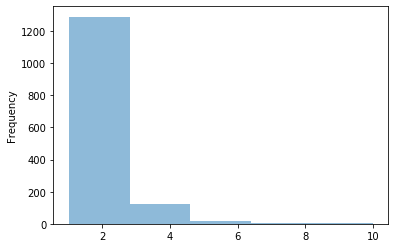

In [22]:
df_submit.plot.hist(bins=5, alpha=0.5)

In [23]:
device = df.groupby(["DEVICE"])["DEVICE"].count()
device = device.sort_values(ascending = False).head(20)
device

DEVICE
iPhone XR         510
iPhone 8 Plus     416
iPhone 7 Plus     299
iPhone XS Max     262
iPhone X          261
iPhone 7          231
iPhone 8          184
iPhone 6s Plus    137
iPhone 6s         125
SM-G960U          114
SM-N950U          101
iPhone12,1         91
iPhone XS          91
SM-N960U           84
iPhone12,5         84
SM-G965U           79
SM-G975U           65
iPhone 6           60
SM-G950U           59
SM-G955U           45
Name: DEVICE, dtype: int64

In [24]:
logins = df[ (df["RESPONSE_STATUS_ID"] == 300200) | (df["RESPONSE_STATUS_ID"] == 300100) ]
print ('number of logins: ',logins.shape[0])

number of logins:  2963


In [25]:
df.groupby(["RESPONSE_STATUS_NAME"])["RESPONSE_STATUS_NAME"].count()

RESPONSE_STATUS_NAME
Documents successfully submitted.                1439
INFORMATION_NOT_VERIFIED_TITLE                   1119
Invalid image content                              27
Successful validation.                           1844
Unable to validate consumer message received.       4
Name: RESPONSE_STATUS_NAME, dtype: int64

In [0]:
df["Time_Lag"] = df["INSERT_TS"] - df["INSERT_TS"].shift(1,fill_value=0) 

In [0]:
df["Time_Lag"] = df["Time_Lag"].dt.total_seconds()

In [37]:
df.head()

,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION,Time_Lag,DEVICE_Lag
INSERT_TS,,,,,,,,,,
2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,Successful validation.,0,0,2019-10-28 02:02:29,1.0.201910230000.2,1.572228e+09,None
2019-10-28 07:25:18,300100,SM-N960U1,28,Successful validation.,0,0,2019-10-28 07:25:21,1.0,1.937100e+04,iPhone 6s Plus
2019-10-28 08:05:07,300100,SM-G960U,28,Successful validation.,0,0,2019-10-28 08:05:12,1.0,2.389000e+03,SM-N960U1
2019-10-28 08:32:42,300100,SM-G960U,28,Successful validation.,0,0,2019-10-28 08:32:46,1.0,1.655000e+03,SM-G960U
2019-10-28 08:33:43,300200,SM-G960U,28,INFORMATION_NOT_VERIFIED_TITLE,0,0,2019-10-28 08:33:47,1.0,6.100000e+01,SM-G960U


In [0]:
df_Copy = df.copy()

In [0]:
#df["RESPONSE_STATUS_ID"] = df["RESPONSE_STATUS_ID"].replace( [300200,300100,300202,400205,400100,], [1,2,3,4,5])

In [0]:
df["DEVICE_Lag"] = df["DEVICE"].shift(1,fill_value="None") 

In [32]:
df.head(5)

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION,Time_Lag,DEVICE_Lag
0,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,Successful validation.,0,0,2019-10-28 02:02:29,1.0.201910230000.2,18197 days 02:02:27,None
1,2019-10-28 07:25:18,300100,SM-N960U1,28,Successful validation.,0,0,2019-10-28 07:25:21,1.0,0 days 05:22:51,iPhone 6s Plus
2,2019-10-28 08:05:07,300100,SM-G960U,28,Successful validation.,0,0,2019-10-28 08:05:12,1.0,0 days 00:39:49,SM-N960U1
3,2019-10-28 08:32:42,300100,SM-G960U,28,Successful validation.,0,0,2019-10-28 08:32:46,1.0,0 days 00:27:35,SM-G960U
4,2019-10-28 08:33:43,300200,SM-G960U,28,INFORMATION_NOT_VERIFIED_TITLE,0,0,2019-10-28 08:33:47,1.0,0 days 00:01:01,SM-G960U


In [33]:
df.set_index("INSERT_TS", inplace=True)
df.head(2)

,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION,Time_Lag,DEVICE_Lag
INSERT_TS,,,,,,,,,,
2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,Successful validation.,0,0,2019-10-28 02:02:29,1.0.201910230000.2,18197 days 02:02:27,None
2019-10-28 07:25:18,300100,SM-N960U1,28,Successful validation.,0,0,2019-10-28 07:25:21,1.0,0 days 05:22:51,iPhone 6s Plus


In [39]:
df[ (df['DEVICE']==df['DEVICE_Lag']) & (df['RESPONSE_STATUS_NAME']=='INFORMATION_NOT_VERIFIED_TITLE') & (df['Time_Lag'] < 120.) ]

,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION,Time_Lag,DEVICE_Lag
INSERT_TS,,,,,,,,,,
2019-10-28 08:33:43,300200,SM-G960U,28,INFORMATION_NOT_VERIFIED_TITLE,0,0,2019-10-28 08:33:47,1.0,61.0,SM-G960U
2019-10-28 09:08:27,300200,iPhone 8 Plus,13.1.2,INFORMATION_NOT_VERIFIED_TITLE,0,0,2019-10-28 09:08:27,1.0.201910230000.2,69.0,iPhone 8 Plus
2019-10-28 09:49:39,300200,LM-G820,28,INFORMATION_NOT_VERIFIED_TITLE,0,0,2019-10-28 09:49:51,1.0,26.0,LM-G820
2019-10-28 09:54:54,300200,LM-G820,28,INFORMATION_NOT_VERIFIED_TITLE,0,0,2019-10-28 09:54:56,1.0,115.0,LM-G820
2019-10-28 11:01:46,300200,iPhone XS Max,13.1.3,INFORMATION_NOT_VERIFIED_TITLE,0,0,2019-10-28 11:01:46,1.0.201910230000.2,35.0,iPhone XS Max
...,...,...,...,...,...,...,...,...,...,...
2019-11-01 15:00:36,300200,Pixel 2 XL,28,INFORMATION_NOT_VERIFIED_TITLE,0,0,2019-11-01 15:00:36,1.0,41.0,Pixel 2 XL
2019-11-01 15:06:15,300200,iPhone XS Max,13.1.3,INFORMATION_NOT_VERIFIED_TITLE,0,0,2019-11-01 15:06:17,1.0.201910230000.2,35.0,iPhone XS Max
2019-11-01 15:11:05,300200,iPhone 8,13.1.3,INFORMATION_NOT_VERIFIED_TITLE,0,0,2019-11-01 15:11:05,1.0.201910230000.2,47.0,iPhone 8


In [0]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})



In [0]:
#df["RESPONSE_STATUS_ID"].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True))

df_Day = df.resample('D').sum()

In [44]:
df_Day.head()

,RESPONSE_STATUS_ID,Size,Page Count,Time_Lag
INSERT_TS,,,,
2019-10-28,230888977,817416288,386,1.572307e+09
2019-10-29,311519162,1007247232,480,8.686800e+04
2019-10-30,359833300,1266789536,592,8.646500e+04
2019-10-31,310215202,1150769392,513,8.377600e+04
2019-11-01,264601802,801725568,340,6.227400e+04
